<a href="https://colab.research.google.com/github/kenwilliford/ML_miscellany/blob/main/exploration_of_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration of word embeddings

In this notebook, we examine trained word embeddings, and explore word similarities.

In [ ]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [ ]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [ ]:
model.most_similar("zero", topn=20)

[('mean', 0.8193914890289307),
 ('maximum', 0.7764415144920349),
 ('limit', 0.7648297548294067),
 ('rate', 0.7561405897140503),
 ('above', 0.7507033348083496),
 ('measured', 0.750206708908081),
 ('increases', 0.7471832633018494),
 ('below', 0.7422546744346619),
 ('measure', 0.741358757019043),
 ('increase', 0.740063488483429),
 ('actual', 0.7374106645584106),
 ('minimum', 0.7373260855674744),
 ('reduction', 0.7334895730018616),
 ('factor', 0.7334457635879517),
 ('value', 0.7328599691390991),
 ('effect', 0.7317513227462769),
 ('difference', 0.7316306233406067),
 ('equivalent', 0.728603720664978),
 ('ratio', 0.7271504402160645),
 ('probability', 0.7253283858299255)]

Find the cosine similarity between two words

In [ ]:
model.similarity("zero", "mean")

0.8193915

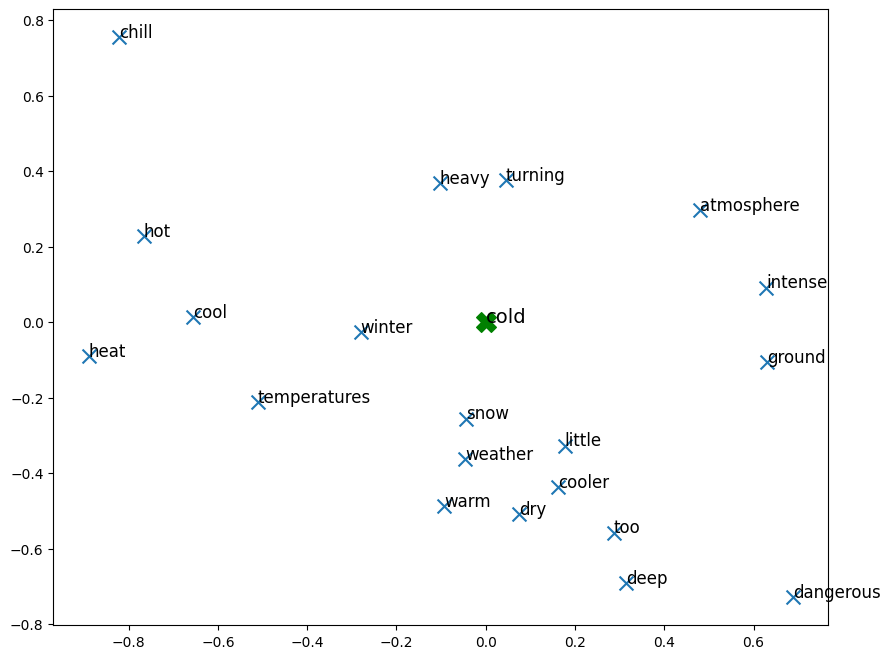

In [ ]:
import matplotlib.pyplot as plt

word = 'cold'
similar_words = model.similar_by_word(word, topn=20)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
x = [vector[0] for vector in similar_word_vectors]
y = [vector[20] for vector in similar_word_vectors]
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, marker='x', s=100) # set marker as 'x' and increase size to 100

# add labels for the similar words
for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax.annotate(word, (x[i], y[i]), size=12) # increase size of the word labels to 12

# add the original word at origin
word = 'cold'
ax.scatter(0, 0, marker='X', s=200, color='green')
ax.annotate(word, (0, 0), size=14)

# show the plot
plt.show()

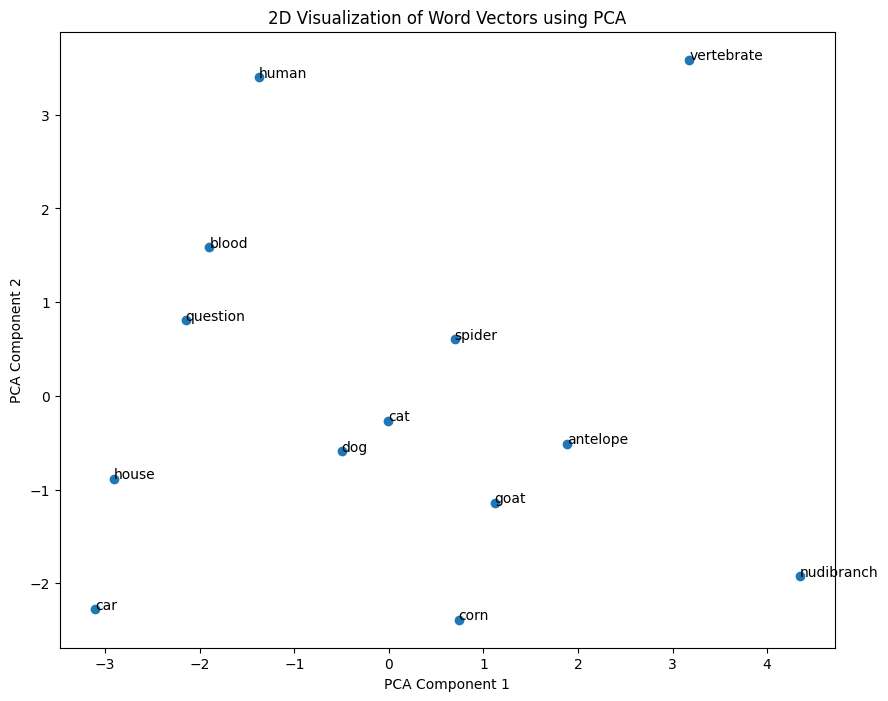

In [ ]:
# Importing necessary libraries
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'word_vectors' is a list of word vectors (50-dimensional) obtained from your GloVe model
# Replace 'word_list' with your list of words
word_list = ['dog', 'cat', 'human', 'goat', 'car', 'antelope', 'corn', 'house', 'nudibranch', 'question', 'blood', 'vertebrate', 'spider']  # Example word list
word_vectors = [model[word] for word in word_list]

# Convert list of vectors to a 2D array
X = np.array(word_vectors)

# Initialize PCA to reduce the dimensions to 2
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Plotting the PCA results
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

# Annotating the points with corresponding words
for i, word in enumerate(word_list):
    plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Word Vectors using PCA')
plt.show()


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import gensim.downloader

# Load the GloVe model if it's not already loaded
model = gensim.downloader.load("glove-wiki-gigaword-50")

# Define a list of stop words (you can use NLTK's list or any other list of stop words)
stop_words = set(['the', 'and', 'is', 'in', 'to', 'of'])  # Example stop words

# Passage provided
passage = """In analyzing the Gensim glove-wiki-gigaword-50 model, I focused on understanding word embeddings and their relationships through cosine similarity. The primary observation is that high cosine similarity does not necessarily indicate synonymous words; it also includes antonyms. This finding challenges the initial idea that cosine similarity equates to meaning similarity. For example, "hot" and "cold" may have high cosine similarity due to their frequent contextual co-occurrence in topics like weather or temperature...

This exploration highlights that cosine similarity in word embeddings reflects the likelihood of words appearing in similar contexts, not just their semantic similarity. It suggests that the model, trained on Wikipedia's extensive corpus, captures word usage patterns in different contexts.

However, this raises questions about distinguishing between synonyms and antonyms when both can have high cosine similarities. What other metrics or methods could improve our understanding of word relationships in natural language processing?"""

# Tokenizing the passage
words = passage.split()

# Filter out words not in the model's vocabulary and stop words
filtered_words = [word for word in words if word in model.key_to_index and word.lower() not in stop_words]

# Extracting word vectors
word_vectors = [model[word] for word in filtered_words]

# Calculating cosine similarity matrix
similarity_matrix = cosine_similarity(word_vectors)

# Calculating average cosine similarity
# Exclude diagonal elements (self-similarity) for averaging
n_words = len(filtered_words)
avg_cosine_similarity = np.sum(similarity_matrix) - n_words
avg_cosine_similarity /= (n_words ** 2 - n_words)

print(avg_cosine_similarity)


0.4090275714334029


In [ ]:
# Creating a list to hold word pairs and their similarities
word_pairs = []

# Iterating over the similarity matrix to populate the list
for i in range(len(filtered_words)):
    for j in range(i + 1, len(filtered_words)):
        word_pairs.append(((filtered_words[i], filtered_words[j]), similarity_matrix[i][j]))

# Sorting the list based on similarity
word_pairs.sort(key=lambda x: x[1], reverse=True)

# Selecting the top 5 pairs
top_five_pairs = word_pairs[:5]

# Printing the top 5 pairs with their similarity scores
for pair in top_five_pairs:
    print(f"Words: {pair[0]}, Similarity: {pair[1]}")

Words: ('understanding', 'understanding'), Similarity: 1.0000001192092896
Words: ('embeddings', 'embeddings'), Similarity: 1.0000001192092896
Words: ('cosine', 'cosine'), Similarity: 1.0000001192092896
Words: ('cosine', 'cosine'), Similarity: 1.0000001192092896
Words: ('cosine', 'cosine'), Similarity: 1.0000001192092896


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader

# Load the GloVe model if it's not already loaded
model = gensim.downloader.load("glove-wiki-gigaword-50")

# Define a list of stop words (you can use NLTK's list or any other list of stop words)
stop_words = set(['the', 'and', 'is', 'in', 'to', 'of', 'it', 'that', 'this'])  # Example stop words

# Passage provided
passage = """In analyzing the Gensim glove-wiki-gigaword-50 model, I focused on understanding word embeddings and their relationships through cosine similarity. The primary observation is that high cosine similarity does not necessarily indicate synonymous words; it also includes antonyms. This finding challenges the initial idea that cosine similarity equates to meaning similarity. For example, "hot" and "cold" may have high cosine similarity due to their frequent contextual co-occurrence in topics like weather or temperature...

This exploration highlights that cosine similarity in word embeddings reflects the likelihood of words appearing in similar contexts, not just their semantic similarity. It suggests that the model, trained on Wikipedia's extensive corpus, captures word usage patterns in different contexts.

However, this raises questions about distinguishing between synonyms and antonyms when both can have high cosine similarities. What other metrics or methods could improve our understanding of word relationships in natural language processing?"""

# Tokenizing the passage
words = passage.split()

# Filter out words not in the model's vocabulary and stop words
filtered_words = [word for word in words if word in model.key_to_index and word.lower() not in stop_words]

# Extracting word vectors
word_vectors = [model[word] for word in filtered_words]

# Calculating cosine similarity matrix
similarity_matrix = cosine_similarity(word_vectors)

# Creating a list to hold word pairs and their similarities
word_pairs = []

# Iterating over the similarity matrix to populate the list
for i in range(len(filtered_words)):
    for j in range(i + 1, len(filtered_words)):
        if filtered_words[i] != filtered_words[j]:  # Excluding pairs of the same word
            word_pairs.append(((filtered_words[i], filtered_words[j]), similarity_matrix[i][j]))

# Sorting the list based on similarity
word_pairs.sort(key=lambda x: x[1], reverse=True)

# Selecting the top 10 pairs
top_ten_pairs = word_pairs[:10]

top_ten_pairs

[(('not', 'could'), 0.9373371),
 (('not', 'could'), 0.9373371),
 (('also', 'both'), 0.92909944),
 (('have', 'other'), 0.9088743),
 (('have', 'other'), 0.9088743)]

In [ ]:
# Sorting the list based on similarity
word_pairs.sort(key=lambda x: x[1], reverse=True)

# Selecting the top 10 pairs
top_ten_pairs = word_pairs[:10]

top_ten_pairs

[(('not', 'could'), 0.9373371),
 (('not', 'could'), 0.9373371),
 (('also', 'both'), 0.92909944),
 (('have', 'other'), 0.9088743),
 (('have', 'other'), 0.9088743),
 (('does', 'not'), 0.9039969),
 (('does', 'not'), 0.9039969),
 (('both', 'other'), 0.8941396),
 (('does', 'can'), 0.88840085),
 (('word', 'meaning'), 0.8881693)]